In [1]:
import sys
sys.path.append("../../src")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import pickle
from example_pendulum import get_pendulum_data, pendulum_to_movie
from scipy.integrate import odeint
from autoencoder_pendulum import full_network
from training_pendulum import create_feed_dictionary
from sindy_utils import sindy_simulate_order2
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/marsgao/miniconda3/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marsgao/miniconda3/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marsgao/miniconda3/envs/mars/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marsgao/miniconda3/envs/mars/lib/python3

In [2]:
data_path = os.getcwd() + '/'
save_name = 'model23'
params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)

## Single trajectory plots

In [3]:
arr = np.load("save_26.npy")
arr_truncate = arr[1:-9]
arr_truncate[-1]

array([[-4.52820750e-05],
       [-5.30696379e-05],
       [-7.75296503e-05],
       [-3.99873861e-05],
       [-7.69666512e-05],
       [ 1.67259714e-05],
       [ 1.34957299e-05],
       [ 1.16032606e-04],
       [ 7.75294466e-05],
       [ 7.75296503e-05],
       [-9.75979209e-01],
       [-4.52819877e-05]])

In [4]:
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)

In [5]:
arr_mean

array([[ 9.18136357e-08],
       [-6.15331050e-06],
       [-1.99949136e-08],
       [-5.97453018e-06],
       [ 4.76319852e-06],
       [ 2.02505702e-06],
       [ 2.03429745e-06],
       [-1.01091136e-07],
       [ 2.00409704e-08],
       [ 1.99949136e-08],
       [-9.73134312e-01],
       [ 9.19009472e-08]])

In [6]:
arr_mean + 2*arr_std

array([[ 2.03320513e-04],
       [ 1.16543720e-04],
       [ 2.07652203e-04],
       [ 1.16583931e-04],
       [ 1.28303056e-04],
       [ 1.79904495e-04],
       [ 1.76734573e-04],
       [ 2.07300999e-04],
       [ 2.07692239e-04],
       [ 2.07692192e-04],
       [-9.70222208e-01],
       [ 2.03320600e-04]])

In [7]:
arr_mean - 2*arr_std

array([[-2.03136885e-04],
       [-1.28850341e-04],
       [-2.07692192e-04],
       [-1.28532992e-04],
       [-1.18776659e-04],
       [-1.75854381e-04],
       [-1.72665978e-04],
       [-2.07503182e-04],
       [-2.07652157e-04],
       [-2.07652203e-04],
       [-9.76046416e-01],
       [-2.03136798e-04]])

In [8]:
arr = np.load("save_refinement_23.npy")
arr_truncate = arr[1:-9]
arr_mean = np.mean(arr_truncate, axis=0)
arr_std = np.std(arr_truncate, axis=0)
arr_mean

array([[ 0.01477618],
       [-0.00351383],
       [ 0.00454959],
       [ 0.00711784],
       [ 0.00530077],
       [ 0.00893723],
       [ 0.00125474],
       [ 0.00425862],
       [ 0.00557735],
       [-0.00284468],
       [-0.98879236],
       [-0.00415351]])

In [9]:
arr_mean + 2*arr_std

array([[ 0.17732512],
       [ 0.15463717],
       [ 0.18836377],
       [ 0.17075651],
       [ 0.18236645],
       [ 0.17778711],
       [ 0.14959833],
       [ 0.16498746],
       [ 0.16557078],
       [ 0.15302646],
       [-0.82928811],
       [ 0.16684101]])

In [10]:
arr_mean - 2*arr_std

array([[-0.14777275],
       [-0.16166482],
       [-0.17926459],
       [-0.15652082],
       [-0.17176491],
       [-0.15991265],
       [-0.14708885],
       [-0.15647022],
       [-0.15441608],
       [-0.15871583],
       [-1.14829661],
       [-0.17514803]])

-0.004153510007308796 0.08549726015861688
-0.9887923592329025 0.07975212580864512
-0.002844682798604481 0.07793557245777834
0.005577350667444989 0.0799967169770456
0.004258618773892522 0.08036442188691505
0.0012547398975584656 0.07417179294986624
0.008937228976283223 0.08442494001445769
0.005300770940957591 0.08853284030977478
0.007117844017921015 0.08181933397003051
0.00454958648653701 0.09190708957750239
-0.0035138268384616823 0.07907549792964626
0.014776182691566647 0.08127446770412634


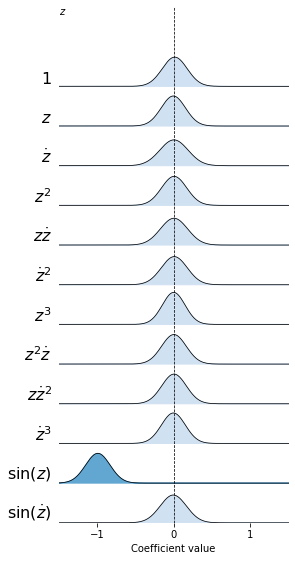

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

library_names = [r"$1$", r"$z$", r"$\dot{z}$", r"$z^2$", r"$z\dot{z}$", r"$\dot{z}^2$",
                r"$z^3$",r"$z^2\dot{z}$",r"$z\dot{z}^2$",r"$\dot{z}^3$",r"$\sin(z)$",r"$\sin(\dot{z})$",]
library_names.reverse()
def curve(arr):
    n = 1
    center = np.mean(arr)
    scale = np.std(arr)
    print(center, scale)
    scale *= 2.0
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    X = 1.0/(scale*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - center) / scale)**2)
    return X/10.0

cmap = mpl.cm.get_cmap("Blues")
fig = plt.figure(figsize=(8, 8))
arr_truncate = arr_truncate.reshape((100, 12))

ax = None
for n in range(1):
    ax = plt.subplot(1, 2, n + 1, frameon=False, sharex=ax)
    for i in range(len(arr_mean)):
        Y = curve(arr_truncate[:,11-i])
#         hist, bin_edges = np.histogram(arr_truncate[:,i], density=True)
#         Y = hist/len(arr_truncate[:,i])
        X = np.linspace(-3, 3, len(Y))
        ax.plot(X, 3 * Y + i, color="k", linewidth=0.75, zorder=100 - i)
        color = cmap(abs(arr_mean[11-i]) / 3.0 + 0.2)
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)

    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(3, 13)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    ax.text(
        0.0,
        1.0,
        r"$z$",
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(len(arr_mean)))
#         ax.set_yticklabels(["Serie %d" % i for i in range(1, len(arr_mean)+1)])
        ax.set_yticklabels(library_names)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)

plt.rcParams.update({'font.size': 20})
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(fig, cax=cax)
plt.tight_layout()
plt.xlabel('Coefficient value')
plt.show()

-0.004153510007308796 0.08549726015861688
-0.9887923592329025 0.07975212580864512
-0.002844682798604481 0.07793557245777834
0.005577350667444989 0.0799967169770456
0.004258618773892522 0.08036442188691505
0.0012547398975584656 0.07417179294986624
0.008937228976283223 0.08442494001445769
0.005300770940957591 0.08853284030977478
0.007117844017921015 0.08181933397003051
0.00454958648653701 0.09190708957750239
-0.0035138268384616823 0.07907549792964626
0.014776182691566647 0.08127446770412634


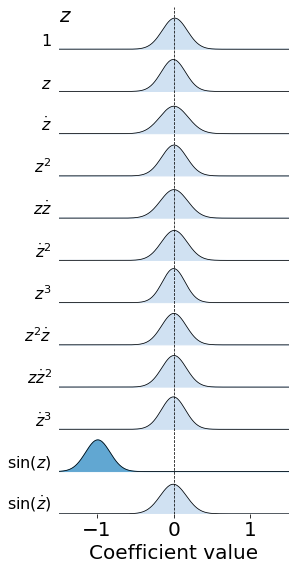

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

library_names = [r"$1$", r"$z$", r"$\dot{z}$", r"$z^2$", r"$z\dot{z}$", r"$\dot{z}^2$",
                r"$z^3$",r"$z^2\dot{z}$",r"$z\dot{z}^2$",r"$\dot{z}^3$",r"$\sin(z)$",r"$\sin(\dot{z})$",]
library_names.reverse()
def curve(arr):
    n = 1
    center = np.mean(arr)
    scale = np.std(arr)
    print(center, scale)
    scale *= 2.0
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    X = 1.0/(scale*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - center) / scale)**2)
    return X/10.0

cmap = mpl.cm.get_cmap("Blues")
fig = plt.figure(figsize=(8, 8))
arr_truncate = arr_truncate.reshape((100, 12))

ax = None
for n in range(1):
    ax = plt.subplot(1, 2, n + 1, frameon=False, sharex=ax)
    for i in range(len(arr_mean)):
        Y = curve(arr_truncate[:,11-i])
#         hist, bin_edges = np.histogram(arr_truncate[:,i], density=True)
#         Y = hist/len(arr_truncate[:,i])
#         kde_vars = arr_truncate[:,11-i] + np.random.normal(0, 0.001, (100,))
#         gkde = gaussian_kde(dataset=kde_vars)
        X = np.linspace(-3, 3, 500)
#         Y = gkde.evaluate(X)
#         Y /= (np.max(Y) + np.std(Y))/0.5
        ax.plot(X, Y * 3 + i, color="k", linewidth=0.75, zorder=100 - i)
        color = cmap(abs(arr_mean[11-i]) / 3.0 + 0.2)
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)

    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(3, 12)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    ax.text(
        0.0,
        1.0,
        r"$z$",
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(len(arr_mean)))
#         ax.set_yticklabels(["Serie %d" % i for i in range(1, len(arr_mean)+1)])
        ax.set_yticklabels(library_names)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)

plt.rcParams.update({'font.size': 20})
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(fig, cax=cax)
plt.tight_layout()
plt.xlabel('Coefficient value')
plt.show()

In [14]:
t = np.arange(0, 100, .02)
z0s = np.pi/np.array([1.5,2,3,4,8,16])
dz0s = .5*np.ones(z0s.shape)

f  = lambda z, t : [z[1], -np.sin(z[0])]
n_ics = z0s.size

z = np.zeros((n_ics,t.size,2))
dz = np.zeros(z.shape)
for i in range(n_ics):
    z[i] = odeint(f, [z0s[i],dz0s[i]], t)
    dz[i] = np.array([f(z[i,j], t[j]) for j in range(len(t))])
    
x,dx,ddx = pendulum_to_movie(z,dz)

In [16]:
test_data = {}
test_data['x'] = x.reshape((-1,params['input_dim']))
test_data['dx'] = dx.reshape((-1,params['input_dim']))
test_data['ddx'] = ddx.reshape((-1,params['input_dim']))
test_data['z'] = z[:,:,0].reshape((-1,params['latent_dim']))
test_data['dz'] = z[:,:,1].reshape((-1,params['latent_dim']))
test_data['ddz'] = dz[:,:,1].reshape((-1,params['latent_dim']))

### 

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /home/marsgao/BayesianSindyAutoencoder/exmaples/pendulum/model23


In [18]:
test_set_results['ddz']

array([[ 0.9041399 ],
       [ 0.8596128 ],
       [ 0.822137  ],
       ...,
       [-0.45664233],
       [-0.4606692 ],
       [-0.46467817]], dtype=float32)

In [19]:
test_set_results['ddz_predict']

array([[ 0.8707058 ],
       [ 0.86605227],
       [ 0.8614863 ],
       ...,
       [-0.46310192],
       [-0.46739778],
       [-0.4715217 ]], dtype=float32)

In [20]:
test_set_results['z']

array([[-2.0703712 ],
       [-2.080078  ],
       [-2.0894408 ],
       ...,
       [ 0.48574558],
       [ 0.49064925],
       [ 0.49536875]], dtype=float32)

In [21]:
true_coefficients = np.zeros(test_set_results['sindy_coefficients'].shape)
true_coefficients[-2] = -1.

z_sim = np.zeros((n_ics, t.size, 2))
pendulum_sim = np.zeros(z_sim.shape)
mc_num = 10
mc_z_sim = np.zeros((mc_num, n_ics, t.size, 2))
for i in range(n_ics):
    z_sim[i] = sindy_simulate_order2(test_set_results['z'][i*t.size], test_set_results['dz'][i*t.size], t,
                                     params['coefficient_mask']*test_set_results['sindy_coefficients'],
                                     params['poly_order'], params['include_sine'])
    for j in range(mc_num):
#         mc_z_sim[j,i] = sindy_simulate_order2(test_set_results['z'][i*t.size], test_set_results['dz'][i*t.size], t,
#                                      (params['coefficient_mask'].T*arr_truncate[j*8]).T,
#                                      params['poly_order'], params['include_sine'])
        coeff = arr_truncate[j*8].reshape(12, 1)
        mc_z_sim[j,i] = sindy_simulate_order2(test_set_results['z'][i*t.size], test_set_results['dz'][i*t.size], t,
                                     params['coefficient_mask']*coeff,
                                     params['poly_order'], params['include_sine'])
    pendulum_sim[i] = sindy_simulate_order2(test_data['z'][i*t.size], test_data['dz'][i*t.size], t,
                                            true_coefficients,
                                            params['poly_order'], params['include_sine'])

In [22]:
arr_truncate[0]

array([ 0.02218421, -0.17029601, -0.02138738,  0.03607338, -0.04678424,
        0.08997827, -0.01335884, -0.03588934,  0.0401166 ,  0.10957459,
       -0.90164912,  0.04521118])

In [23]:
mc_z_sim.shape

(10, 6, 5000, 2)

([], [])

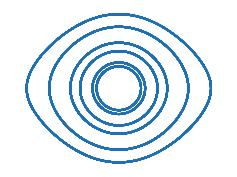

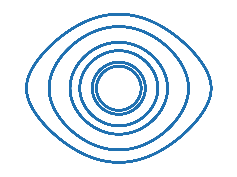

In [24]:
plt.figure(figsize=(4,3))
plt.plot(z_sim[:,:,0].T, z_sim[:,:,1].T, linewidth=2, color='#2071B1')
plt.axis('equal')
plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(4,3))
plt.plot(pendulum_sim[:,:,0].T, pendulum_sim[:,:,1].T, linewidth=2, color='#2071B1')
plt.axis('equal')
plt.axis('off')
plt.xticks([])
plt.yticks([])

(-249.95000000000002, 5248.95, -1.8412350300081406, 1.85953459797931)

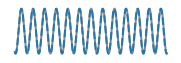

In [25]:
ic_idx = 1

plt.figure(figsize=(3,2))
plt.subplot(2,1,1)
plt.plot(test_set_results['z'][ic_idx*t.size:(ic_idx+1)*t.size,0], 'k', color='#888888', linewidth=2)
plt.plot(z_sim[ic_idx,:,0], '--', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.axis('off')

(-249.95000000000002, 5248.95, -1.840529570899631, 1.8595010046884288)

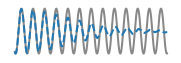

In [26]:
ic_idx = 1

plt.figure(figsize=(3,2))
plt.subplot(2,1,1)
plt.plot(test_set_results['z'][ic_idx*t.size:(ic_idx+1)*t.size,0], 'k', color='#888888', linewidth=2)
# plt.plot(z_sim[ic_idx,:,0], '--', linewidth=2)
plt.plot(np.mean(mc_z_sim[:, ic_idx,:,0], axis=0), '--', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.axis('off')

Text(0.5, 0, 'Time')

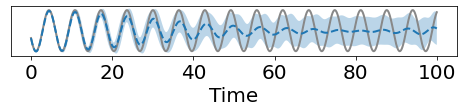

In [43]:
ic_idx = 5

plt.figure(figsize=(8,2))
plt.subplot(2,1,1)
plt.plot(t, test_set_results['z'][ic_idx*t.size:(ic_idx+1)*t.size,0], 'k', color='#888888', linewidth=2)
# plt.plot(z_sim[ic_idx,:,0], '--', linewidth=2)
plt.plot(t, np.mean(mc_z_sim[:, ic_idx,:,0], axis=0), '--', linewidth=2)
plt.fill_between(t, np.mean(mc_z_sim[:, ic_idx,:,0], axis=0)-np.std(mc_z_sim[:, ic_idx,:,0], axis=0),
                np.mean(mc_z_sim[:, ic_idx,:,0], axis=0)+np.std(mc_z_sim[:, ic_idx,:,0], axis=0), alpha=0.3)
plt.xticks([0, 20, 40, 60, 80, 100])
# plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
# plt.figure(figsize=(100,2))
# plt.axes([0, 0.6, 1, 1])
# plt.axis('off')

In [57]:
test_data = get_pendulum_data(10)

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /home/marsgao/BayesianSindyAutoencoder/exmaples/pendulum/model23


In [59]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_ddx_error = np.mean((test_data['ddx'] - test_set_results['ddx_decode'])**2)/np.mean(test_data['ddx']**2)
sindy_ddz_error = np.mean((test_set_results['ddz'] - test_set_results['ddz_predict'])**2)/np.mean(test_set_results['ddz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_ddx_error)
print('SINDy reltive error, z: %f' % sindy_ddz_error)

Decoder relative error: 0.000448
Decoder relative SINDy error: 0.000236
SINDy reltive error, z: 0.005527


In [49]:
arr_truncate[:,-2]

array([-0.90164912, -1.01598716, -0.93963552, -0.97494906, -1.0890131 ,
       -1.01851022, -0.98242223, -0.92776918, -0.95872492, -0.97845578,
       -0.86196584, -0.87194848, -1.04193294, -0.97084022, -0.99578577,
       -1.01899111, -1.06442499, -1.07888198, -0.91682065, -1.03888869,
       -1.05523205, -1.0093751 , -1.0304085 , -0.90317708, -1.01589322,
       -1.06245053, -0.85554135, -0.91616613, -1.13478816, -1.05105782,
       -1.09811008, -1.05054271, -1.02617192, -0.82454699, -1.09253335,
       -0.92896593, -0.99111736, -1.20649838, -0.9885602 , -1.06430984,
       -1.13028884, -0.98703241, -0.93297988, -0.90953296, -0.95865637,
       -0.86437982, -1.03780794, -1.0394609 , -0.98516542, -0.88753492,
       -1.08160007, -0.85703737, -0.91108412, -0.98021615, -0.98770893,
       -1.02726138, -0.92705834, -0.91421425, -1.03922474, -1.07099676,
       -0.98265487, -1.02283347, -1.00342345, -1.2649703 , -1.01288998,
       -0.99427801, -0.92546576, -0.94713593, -0.84850901, -1.08

In [50]:
np.mean(arr_truncate[:,-2])

-0.9887923592329025